Import training and testing data for the rating head task.

{train, test}_images: contains the path of each image
{train, test}_scores: contains the user ratings of each image


In [1]:
import tensorflow as tf
import csv

data_folder = '../../Calista/website-aesthetics-datasets-master/rating-based-dataset/preprocess/'

train_data_path = data_folder + 'train_means_list.csv'
test_data_path = data_folder + 'test_list.csv'
images_path = data_folder + 'resized'

def get_scores(scores_path):

    images = []
    scores = []

    with open(scores_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0

        for row in csv_reader:
            if line_count == 0:

                line_count += 1
            else:

                scores.append(float(row[1]))
                line_count += 1
                image_name = row[0]

                images.append(images_path + image_name)

    return (images, scores)

train_images, train_scores = get_scores(train_data_path)
test_images, test_scores = get_scores(test_data_path)

2024-07-20 22:58:51.298523: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 22:58:51.298552: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 22:58:51.299578: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-20 22:58:51.305108: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-20 22:58:51.920884: W tensorflow/compiler/tf2

Shuffle the training set

In [2]:
import random
import numpy as np

# np.random.seed(2000)

temp = list(zip(train_images, train_scores))
random.shuffle(temp)

train_images, train_scores = zip(*temp)


Display the first 3 images to make sure everything is ok.

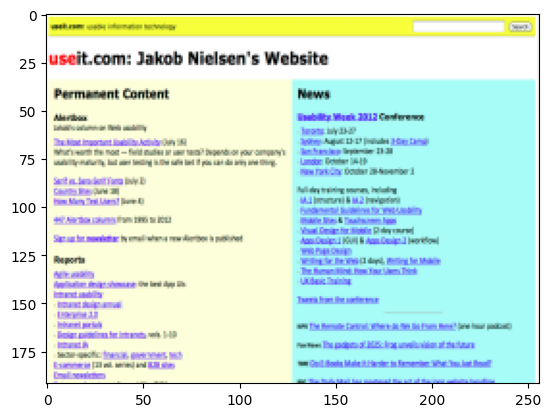

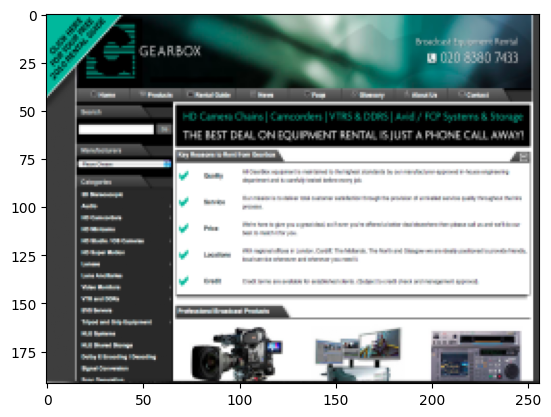

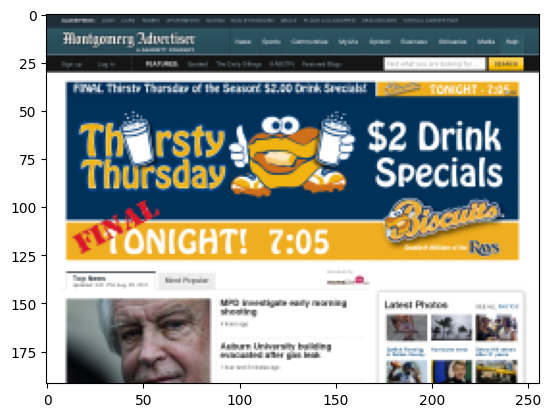

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.image as mping
for ima in train_images[0:3]:
  img = mping.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

Read the images as numpy arrays

In [4]:
import cv2

width = 256
height = 192
channels = 3

def read_and_process_images(list_of_images):
  X = []

  for image in list_of_images:

    # images are already resized
    # X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (width, height),
    #                     interpolation=cv2.INTER_AREA))

    X.append(cv2.imread(image, cv2.IMREAD_COLOR))

  return X


X_train = np.array(read_and_process_images(train_images))
y_train = np.array(train_scores)

X_val = np.array(read_and_process_images(test_images))
y_val = np.array(test_scores)

Display the first 3 images to make sure everything is ok

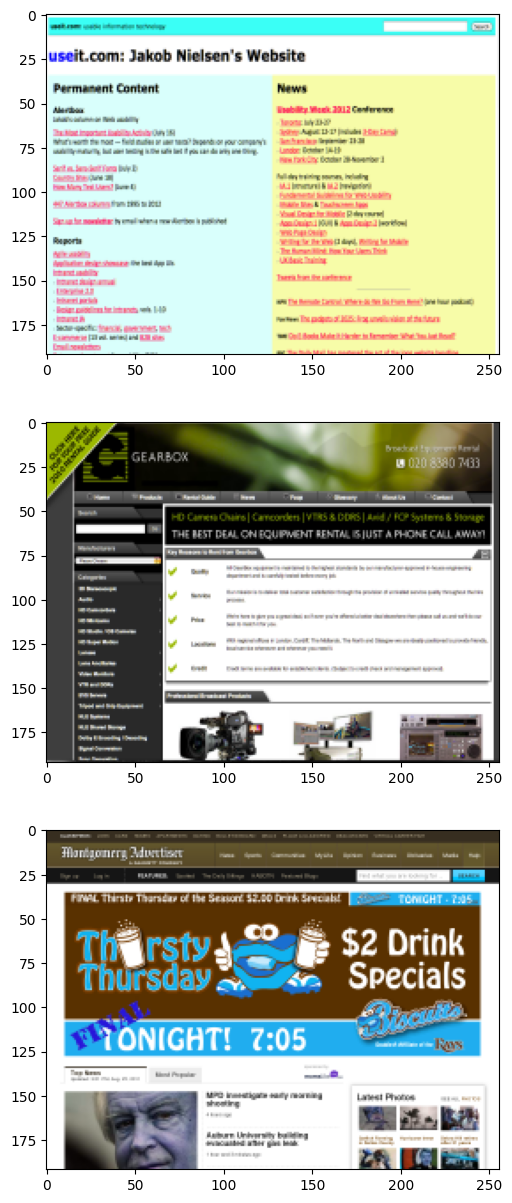

In [5]:
plt.figure(figsize=(25,15))
columns = 3

for i in range(columns):
  plt.subplot(columns, 1, i+1)
  plt.imshow(X_train[i])

Display shapes to check everything is ok

In [6]:
ntrain = len(X_train)
nval = len(X_val)

print('Shape of rating_X_train is: ', X_train.shape)
print('Shape of rating_X_val is: ', X_val.shape)
print('Shape of rating_y_train is: ', y_train.shape)
print('Shape of rating_y_val is: ', y_val.shape)

Shape of rating_X_train is:  (300, 192, 256, 3)
Shape of rating_X_val is:  (98, 192, 256, 3)
Shape of rating_y_train is:  (300,)
Shape of rating_y_val is:  (98,)


Import training and testing data for the comparison head task.

{train, test}_image_pairs: contains the path of each pair of images
{train, test}_labels: contains the labels of each image image, indicating the more aesthetic one.


In [7]:
import os
# New image map folder paths
image_map_folder = 'image_map/'
train_pairs_csv = image_map_folder + 'train_image_pairs.csv'
test_pairs_csv = image_map_folder + 'test_image_pairs.csv'

# Function to get image pairs and labels from CSV
def get_image_pairs_and_labels(pairs_csv_path):
    image_pairs = []
    labels = []
    with open(pairs_csv_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)  # Skip header
        for row in csv_reader:
            image_path1 = row[0]
            image_path2 = row[1]
            label = int(row[2])
            image_pairs.append((image_path1, image_path2))
            labels.append(label)
    return image_pairs, labels

# Get training and testing image pairs and labels
train_image_pairs, train_labels = get_image_pairs_and_labels(train_pairs_csv)
test_image_pairs, test_labels = get_image_pairs_and_labels(test_pairs_csv)

# Print some samples to verify
print(f"Training images: {train_images[:5]}")
print(f"Training scores: {train_scores[:5]}")
print(f"Training image pairs: {train_image_pairs[:5]}")
print(f"Training labels: {train_labels[:5]}")
print(f"Testing images: {test_images[:5]}")
print(f"Testing scores: {test_scores[:5]}")
print(f"Testing image pairs: {test_image_pairs[:5]}")
print(f"Testing labels: {test_labels[:5]}")

print(f"Training pairs: {len(train_image_pairs)}")
print(f"Testing pairs: {len(test_image_pairs)}")

Training images: ('../../Calista/website-aesthetics-datasets-master/rating-based-dataset/preprocess/resized/english_resized/308.png', '../../Calista/website-aesthetics-datasets-master/rating-based-dataset/preprocess/resized/english_resized/51.png', '../../Calista/website-aesthetics-datasets-master/rating-based-dataset/preprocess/resized/english_resized/183.png', '../../Calista/website-aesthetics-datasets-master/rating-based-dataset/preprocess/resized/english_resized/249.png', '../../Calista/website-aesthetics-datasets-master/rating-based-dataset/preprocess/resized/english_resized/0.png')
Training scores: (1.892075078206465, 4.550165380374862, 4.183957219251337, 4.2441025641025645, 2.235651214128035)
Training image pairs: [('../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/250.png', '../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/130.png'), ('../../Calista/website-aesthetics-datasets-master/comparison-base

Shuffle the comparison training set

In [8]:

temp = list(zip(train_image_pairs, train_labels))
random.shuffle(temp)

train_image_pairs, train_labels = zip(*temp)

# print(f"train_labels: {train_labels}")

Display the first 3 pairs to make sure everything is ok.

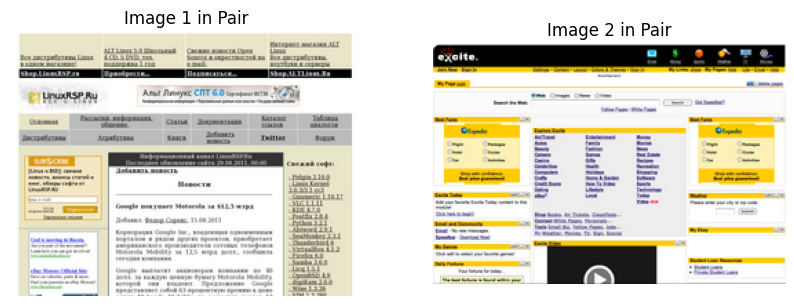

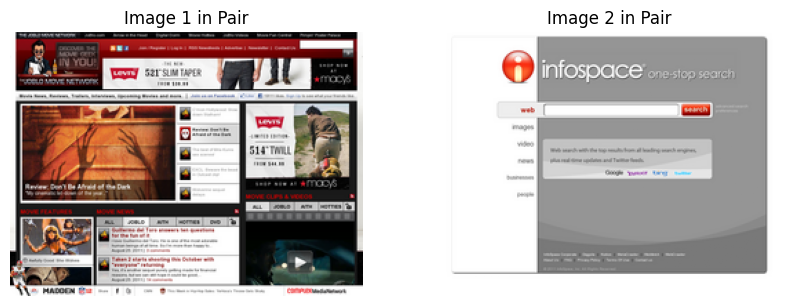

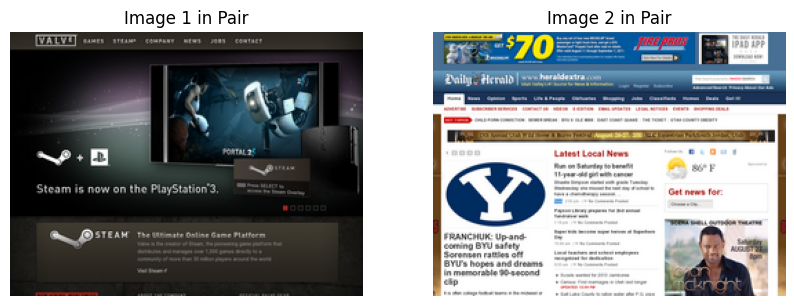

In [9]:
  # Display 3 random pairs of images side by side
for pair in train_image_pairs[:3]:
    img1 = mping.imread(pair[0])  # Read the first image in the pair
    img2 = mping.imread(pair[1])  # Read the second image in the pair

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first image on the first subplot
    axs[0].imshow(img1)
    axs[0].set_title('Image 1 in Pair')
    axs[0].axis('off')  # Hide axes

    # Plot the second image on the second subplot
    axs[1].imshow(img2)
    axs[1].set_title('Image 2 in Pair')
    axs[1].axis('off')  # Hide axes

    # Display the plot
    plt.show()

Read the images as numpy arrays

In [10]:
def read_and_process_image_pairs(list_of_image_pairs):
    X = []

    for image1, image2 in list_of_image_pairs:
        img1 = cv2.imread(image1, cv2.IMREAD_COLOR)
        img2 = cv2.imread(image2, cv2.IMREAD_COLOR)

        #  Resize images if needed
        img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_AREA)
        img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_AREA)
                # Print the dimensions of each image
        print(f"Image1 ({image1}) shape: {img1.shape}")
        print(f"Image2 ({image2}) shape: {img2.shape}")
        # img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_CUBIC)
        # img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_CUBIC)
        # img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_LINEAR)
        # img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_LINEAR)
        # img1 = cv2.resize(img1, (width, height), interpolation=cv2.INTER_LANCZOS4)
        # img2 = cv2.resize(img2, (width, height), interpolation=cv2.INTER_LANCZOS4)


        #         # Maintain aspect ratio by padding
        # img1 = maintain_aspect_ratio_and_resize(img1, width, height)
        # img2 = maintain_aspect_ratio_and_resize(img2, width, height)

        X.append((img1, img2))

    return X

 # Process training image pairs
X_pairs_train = np.array(read_and_process_image_pairs(train_image_pairs))
y_pairs_train = np.array(train_labels)

# Process validation image pairs
X_pairs_val = np.array(read_and_process_image_pairs(test_image_pairs))
y_pairs_val = np.array(test_labels)

# print(f"training pairs shape:   ",X_pairs_train.shape )

Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/354.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/211.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/55.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/47.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/190.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/34.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/236.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/45.png) shape: (1

Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/343.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/189.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/289.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/214.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/279.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/244.png) shape: (192, 256, 3)
Image1 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/308.png) shape: (192, 256, 3)
Image2 (../../Calista/website-aesthetics-datasets-master/comparison-based-dataset/resized_images/53.png) shape:

Display the first 3 images to make sure everything is okay

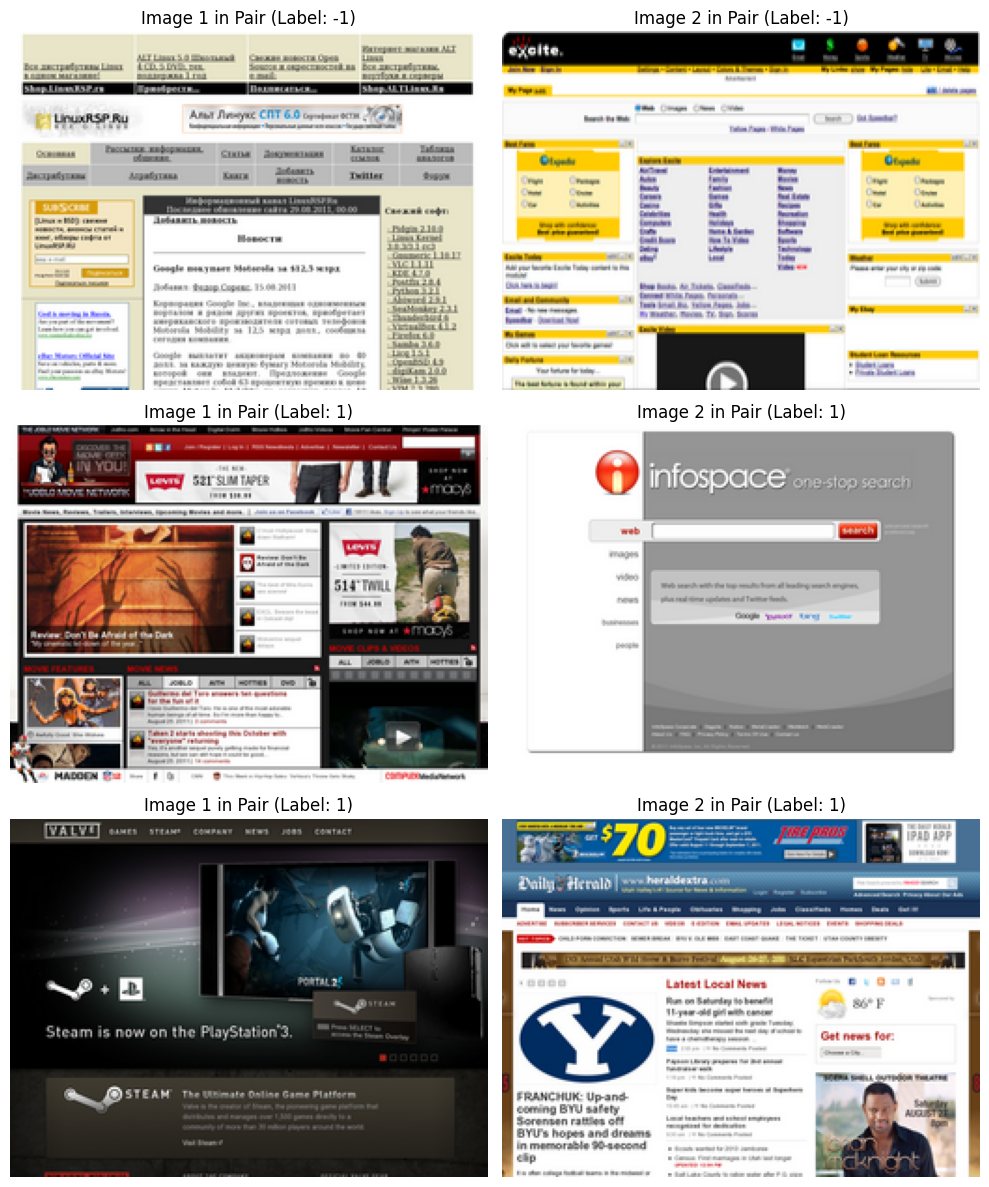

In [11]:
# Number of pairs to display
num_pairs_to_display = 3

# Create subplots
fig, axes = plt.subplots(num_pairs_to_display, 2, figsize=(10, 4 * num_pairs_to_display))

for i in range(num_pairs_to_display):
    img1, img2 = X_pairs_train[i]
    label = y_pairs_train[i]

    # Display the first image in the pair
    axes[i, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f'Image 1 in Pair (Label: {label})')
    axes[i, 0].axis('off')

    # Display the second image in the pair
    axes[i, 1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(f'Image 2 in Pair (Label: {label})')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

Get the weights of the pretrained model. This model is pretrained on the Flickr style dataset (containing 80 K images) for image style recognition task. It aims at the artistic aspect recognition of photographs and it is fine-tuned from another network which has been pretrained on the ImageNet dataset for object recognition task.

In [12]:
# import tensorflow as tf
# import keras
# print("TensorFlow version:", tf.__version__)
# print("Keras version:", keras.__version__)
# from keras import layers
# from keras import models
# from keras import optimizers
# from keras import regularizers
# from keras import initializers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import img_to_array, load_img

# from tensorflow.keras import layers, models, optimizers, regularizers, initializers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import h5py

def traverse_datasets(hdf_file):

    def h5py_dataset_iterator(g, prefix=''):
        for key in g.keys():
            item = g[key]
            path = f'{prefix}/{key}'    
            if isinstance(item, h5py.Dataset): # test for dataset
                yield (path, item)
            elif isinstance(item, h5py.Group): # test for group (go down)
                yield from h5py_dataset_iterator(item, path)

    with h5py.File(hdf_file, 'r') as f:
        for path, _ in h5py_dataset_iterator(f):
            yield path

weights = {}
filename = '../../Calista/pretrainedModels/flickr_style.h5'

with h5py.File(filename, 'r') as f:
    for dset in traverse_datasets(filename):
        print('Path:', dset)
        # print('Shape:', f[dset].shape)
        # print('Data type:', f[dset].dtype)
        weights[dset] = f[dset][:]

conv1_bias = weights['/conv1/conv1/bias:0']
conv1_kernel = weights['/conv1/conv1/kernel:0']
conv2_bias = weights['/conv2/conv2/bias:0']
conv2_kernel = weights['/conv2/conv2/kernel:0']
conv3_bias = weights['/conv3/conv3/bias:0']
conv3_kernel = weights['/conv3/conv3/kernel:0']
conv4_bias = weights['/conv4/conv4/bias:0']
conv4_kernel = weights['/conv4/conv4/kernel:0']
conv5_bias = weights['/conv5/conv5/bias:0']
conv5_kernel = weights['/conv5/conv5/kernel:0']


Path: /conv1/conv1/bias:0
Path: /conv1/conv1/kernel:0
Path: /conv2/conv2/bias:0
Path: /conv2/conv2/kernel:0
Path: /conv3/conv3/bias:0
Path: /conv3/conv3/kernel:0
Path: /conv4/conv4/bias:0
Path: /conv4/conv4/kernel:0
Path: /conv5/conv5/bias:0
Path: /conv5/conv5/kernel:0
Path: /fc6/fc6/bias:0
Path: /fc6/fc6/kernel:0
Path: /fc7/fc7/bias:0
Path: /fc7/fc7/kernel:0
Path: /fc8_flickr/fc8_flickr/bias:0
Path: /fc8_flickr/fc8_flickr/kernel:0


Construct the CNN.

In [13]:
from shared_feature_extractor import create_shared_feature_extractor
from rating_model import create_ratingModel
from comparison_model import create_comparisonModel
from tensorflow import keras
from keras import models, layers

# input_shape = (192, 256, 3)
shared_feature_extractor = create_shared_feature_extractor()
rating_model = create_ratingModel(shared_feature_extractor)
comparison_model = create_comparisonModel(shared_feature_extractor)

rating_input = layers.Input(shape=(192, 256, 3), name = 'rating_input')
comparison_input_a = layers.Input(shape=(192, 256, 3), name = 'comparison_input_a')
comparison_input_b = layers.Input(shape=(192, 256, 3), name = 'comparison_input_b')

# Define outputs for joint model
rating_output = rating_model(rating_input)
comparison_output = comparison_model([comparison_input_a, comparison_input_b])

print("Rating Model Output:", rating_output)
print("Comparison Model Output:", comparison_output)

2024-07-20 22:59:02.950259: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-20 22:59:02.982147: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-20 22:59:02.982326: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Rating Model Output: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='rating_model/rating_output/BiasAdd:0', description="created by layer 'rating_model'")
Comparison Model Output: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='comparison_model/comparison_output/Tanh:0', description="created by layer 'comparison_model'")


Call the function to construct the joint-training model.

In [14]:
joint_model = models.Model(
    inputs=[rating_input, comparison_input_a, comparison_input_b],
    outputs=[rating_output, comparison_output],
    name='joint_model'
)


Initialize the weights of the first 5 convolutional layers of the models with the weights of the pretrained model.

In [15]:
shared_feature_extractor.get_layer('conv1').set_weights([conv1_kernel[:, :, :, :], conv1_bias[:]])
shared_feature_extractor.get_layer('conv2_1').set_weights([conv2_kernel[:, :, :, :128], conv2_bias[:128]])
shared_feature_extractor.get_layer('conv2_2').set_weights([conv2_kernel[:, :, :, 128:], conv2_bias[128:]])
shared_feature_extractor.get_layer('conv3').set_weights([conv3_kernel[:, :, :, :], conv3_bias[:]])
shared_feature_extractor.get_layer('conv4_1').set_weights([conv4_kernel[:, :, :, :192], conv4_bias[:192]])
shared_feature_extractor.get_layer('conv4_2').set_weights([conv4_kernel[:, :, :, 192:], conv4_bias[192:]])
shared_feature_extractor.get_layer('conv5_1').set_weights([conv5_kernel[:, :, :, :128], conv5_bias[:128]])
shared_feature_extractor.get_layer('conv5_2').set_weights([conv5_kernel[:, :, :, 128:], conv5_bias[128:]])

# Print the summaries of the individual sub-models
print("\nShared Feature Extractor Summary:")
shared_feature_extractor.summary()

print("\nRating Model Summary:")
rating_model.summary()

print("\nComparison Model Summary:")
comparison_model.summary()

# Print the summary of the joint model
print("Joint Model Summary:")
joint_model.summary()



Shared Feature Extractor Summary:
Model: "shared_feature_extractor"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 im_data (InputLayer)        [(None, 192, 256, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 46, 62, 96)           34944     ['im_data[0][0]']             
                                                                                                  
 pool1 (MaxPooling2D)        (None, 23, 31, 96)           0         ['conv1[0][0]']               
                                                                                                  
 norm1 (LRN)                 (None, 23, 31, 96)           0         ['pool1[0][0]']               
                                        

Define the loss functions (Euclidean Distance Loss and Bradley-Terry based loss)  and the metric (RMSE) that will be used

In [16]:
# Custom RMSE function for rating output
def rating_rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true), axis=-1))

# Custom accuracy function for the comparison output 
def custom_binary_accuracy(y_true, y_pred):
    # Use 0.0 as the threshold for tanh output
    y_pred = tf.where(y_pred >= 0.0, 1.0, -1.0)  # Convert predictions to 1 or -1
    y_true = tf.cast(y_true, tf.float32)
    return tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))

# def euclidean_distance_loss(y_true, y_pred):
#     y_true = tf.cast(y_true, tf.float32)
#     y_pred = tf.cast(y_pred, tf.float32)
#     return 0.5 * tf.reduce_mean(tf.square(y_pred - y_true), axis=-1)

# Define the regression loss for the aesthetic rating task (mean squared error)
def mse_regression_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Define the Bradley-Terry based loss for the comparison task
def bradley_terry_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.reduce_mean(tf.math.log(1 + tf.exp(-y_true * y_pred)))

Define the combined loss function of the model

In [17]:
# # Combined loss function
# def combined_loss(y_true, y_pred, alpha=0.1):
#     # Split y_true and y_pred
#     y_true_rating = y_true[0]
#     y_true_comparison = y_true[1]
#     y_pred_rating = y_pred[0]
#     y_pred_comparison = y_pred[1]

#     y_true_rating = tf.cast(y_true_rating, tf.float32)
#     y_true_comparison = tf.cast(y_true_comparison, tf.float32)

#     loss_a = mse_regression_loss(y_true_rating, y_pred_rating)
#     loss_p = bradley_terry_loss(y_true_comparison, y_pred_comparison)

#     L_combined = alpha * loss_a + (1 - alpha) * loss_p
#     return L_combined

# def custom_combined_loss(y_true, y_pred):
#     y_true_rating = y_true[0]
#     y_true_comparison = y_true[1]
#     y_pred_rating = y_pred[0]
#     y_pred_comparison = y_pred[1]

#     return combined_loss((y_true_rating, y_true_comparison), (y_pred_rating, y_pred_comparison))


Create a Data generator for the aesthetic ratings task

In [18]:
batch_size = 32
from data_generator import rating_data_generator

    
# Define the output signature for the rating generator
rating_output_signature = (
    tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
    tf.TensorSpec(shape=(None,), dtype=tf.float32)
)

# Create TensorFlow Dataset objects for rating task
rating_gen_train = tf.data.Dataset.from_generator(
    lambda: rating_data_generator(X_train, y_train, batch_size),
    output_signature=rating_output_signature
)

rating_gen_val = tf.data.Dataset.from_generator(
    lambda: rating_data_generator(X_val, y_val, batch_size),
    output_signature=rating_output_signature
) 
#repeat???

Create a Custom Data Generator for the comparison task

In [19]:
from data_generator import comparison_data_generator
# Define the output signature
comparison_output_signature = (
    (
        tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32)
    ),
    tf.TensorSpec(shape=(None,), dtype=tf.float32)
)

# Create TensorFlow Dataset objects
comparison_gen_train = tf.data.Dataset.from_generator(
    lambda: comparison_data_generator(X_pairs_train, y_pairs_train, batch_size),
    output_signature=comparison_output_signature
)

comparison_gen_val = tf.data.Dataset.from_generator(
    lambda: comparison_data_generator(X_pairs_val, y_pairs_val, batch_size),
    output_signature=comparison_output_signature
)

Create a combined generator that yields data for both tasks simultaneously



In [20]:
from data_generator import combined_data_generator

# # Create the combined generators for training and validation
# combined_gen_train = combined_data_generator(rating_gen_train, comparison_gen_train)
# combined_gen_val = combined_data_generator(rating_gen_val, comparison_gen_val)


# Create TensorFlow Dataset objects for the combined generator
combined_gen_train = tf.data.Dataset.from_generator(
    lambda: combined_data_generator(rating_gen_train, comparison_gen_train, batch_size),
    output_signature=(
        (
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32)
        ),
        (
            tf.TensorSpec(shape=(None,), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32)
        )
    )
)

combined_gen_val = tf.data.Dataset.from_generator(
    lambda: combined_data_generator(rating_gen_val, comparison_gen_val, batch_size),
    output_signature=(
        (
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32)
        ),
        (
            tf.TensorSpec(shape=(None,), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32)
        )
    )
)

In [21]:

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, X_rating, y_rating, X_pairs, y_pairs, batch_size, normalize=True):
        self.X_rating = X_rating
        self.y_rating = y_rating
        self.X_pairs = X_pairs
        self.y_pairs = y_pairs
        self.batch_size = batch_size
        self.normalize = normalize
        self.indexes = np.arange(len(self.X_rating))
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.floor(len(self.X_rating) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        
        X_rating_batch = self.X_rating[batch_indexes]
        y_rating_batch = self.y_rating[batch_indexes]
        
        X_pairs_batch = self.X_pairs[batch_indexes]
        y_pairs_batch = self.y_pairs[batch_indexes]
        
        comparison_input_a = np.array([pair[0] for pair in X_pairs_batch])
        comparison_input_b = np.array([pair[1] for pair in X_pairs_batch])
        
        if self.normalize:
            X_rating_batch = self.normalize_images(X_rating_batch)
            comparison_input_a = self.normalize_images(comparison_input_a)
            comparison_input_b = self.normalize_images(comparison_input_b)
        
        return [X_rating_batch, comparison_input_a, comparison_input_b], [y_rating_batch, y_pairs_batch]
    
    def on_epoch_end(self):
        np.random.shuffle(self.indexes)
    
    def normalize_images(self, images):
        return images / 255.0

train_generator = DataGenerator(X_train, y_train, X_pairs_train, y_pairs_train, batch_size)
val_generator = DataGenerator(X_val, y_val, X_pairs_val, y_pairs_val, batch_size)       



# # Define the Data Generators for each task
# class RatingDataGenerator(tf.keras.utils.Sequence):
#     def __init__(self, X, y, batch_size, normalize=True):
#         self.X = X
#         self.y = y
#         self.batch_size = batch_size
#         self.normalize = normalize
#         self.indexes = np.arange(len(self.X))
#         self.on_epoch_end()
        
#     def __len__(self):
#         return int(np.floor(len(self.X) / self.batch_size))

#     def __getitem__(self, index):
#         batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
#         X_batch = self.X[batch_indexes]
#         y_batch = self.y[batch_indexes]
        
#         if self.normalize:
#             X_batch = self.normalize_images(X_batch)
        
#         return X_batch, y_batch
    
#     def on_epoch_end(self):
#         np.random.shuffle(self.indexes)
    
#     def normalize_images(self, images):
#         return images / 255.0

# class ComparisonDataGenerator(tf.keras.utils.Sequence):
#     def __init__(self, X_pairs, y_pairs, batch_size, normalize=True):
#         self.X_pairs = X_pairs
#         self.y_pairs = y_pairs
#         self.batch_size = batch_size
#         self.normalize = normalize
#         self.indexes = np.arange(len(self.X_pairs))
#         self.on_epoch_end()
        
#     def __len__(self):
#         return int(np.floor(len(self.X_pairs) / self.batch_size))

#     def __getitem__(self, index):
#         batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
#         X_pairs_batch = [self.X_pairs[k] for k in batch_indexes]
#         y_pairs_batch = self.y_pairs[batch_indexes]
        
#         comparison_input_a = np.array([pair[0] for pair in X_pairs_batch])
#         comparison_input_b = np.array([pair[1] for pair in X_pairs_batch])
        
#         if self.normalize:
#             comparison_input_a = self.normalize_images(comparison_input_a)
#             comparison_input_b = self.normalize_images(comparison_input_b)
        
#         return [comparison_input_a, comparison_input_b], y_pairs_batch
    
#     def on_epoch_end(self):
#         np.random.shuffle(self.indexes)
    
#     def normalize_images(self, images):
#         return images / 255.0

# # Define the combined generator with reinitialization logic
# class CombinedDataGenerator(tf.keras.utils.Sequence):
#     def __init__(self, rating_gen, comparison_gen, rating_batch_size, comparison_batch_size):
#         self.rating_gen = rating_gen
#         self.comparison_gen = comparison_gen
#         self.rating_batch_size = rating_batch_size
#         self.comparison_batch_size = comparison_batch_size
#         self.rating_iter = iter(self.rating_gen)
#         self.comparison_iter = iter(self.comparison_gen)
        
#     def __len__(self):
#         return max(len(self.rating_gen), len(self.comparison_gen))

#     def __getitem__(self, index):
#         try:
#             rating_data, rating_labels = next(self.rating_iter)
#         except StopIteration:
#             self.rating_iter = iter(self.rating_gen)
#             rating_data, rating_labels = next(self.rating_iter)
        
#         try:
#             comparison_data, comparison_labels = next(self.comparison_iter)
#         except StopIteration:
#             self.comparison_iter = iter(self.comparison_gen)
#             comparison_data, comparison_labels = next(self.comparison_iter)
        
#         return [rating_data, comparison_data[0], comparison_data[1]], [rating_labels, comparison_labels]
    
#     def on_epoch_end(self):
#         self.rating_gen.on_epoch_end()
#         self.comparison_gen.on_epoch_end()
#         self.rating_iter = iter(self.rating_gen)
#         self.comparison_iter = iter(self.comparison_gen)

# # Create data generators for each task
# rating_batch_size = 32
# comparison_batch_size = 64  # Larger batch size for the comparison task

# rating_gen_train = RatingDataGenerator(X_train, y_train, rating_batch_size)
# comparison_gen_train = ComparisonDataGenerator(X_pairs_train, y_pairs_train, comparison_batch_size)
# rating_gen_val = RatingDataGenerator(X_val, y_val, rating_batch_size)
# comparison_gen_val = ComparisonDataGenerator(X_pairs_val, y_pairs_val, comparison_batch_size)

# # Create the combined generators for training and validation
# train_generator = CombinedDataGenerator(rating_gen_train, comparison_gen_train, rating_batch_size, comparison_batch_size)
# val_generator = CombinedDataGenerator(rating_gen_val, comparison_gen_val, rating_batch_size, comparison_batch_size)

Compile the models. Use RMSE to measure performance.

In [22]:

from keras.utils import get_custom_objects

epochs = 80
# base_lr = 0.0001
base_lr = 1e-3
initial_learning_rate = base_lr
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

adam_optimizer = tf.keras.optimizers.Adam(initial_learning_rate)

sgd = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)


# joint_model.compile(loss=custom_combined_loss, optimizer=adam_optimizer,
#                     metrics={
#     'rating_model' : [rating_rmse],
#     'comparison_model' : [custom_binary_accuracy]
#      })


# Register the custom loss functions and metrics
get_custom_objects().update({
    'mse_regression_loss': mse_regression_loss,
    'bradley_terry_loss': bradley_terry_loss,
    'rating_rmse': rating_rmse,
    'custom_binary_accuracy': custom_binary_accuracy
})


alpha=0.3
joint_model.compile(
    optimizer=sgd, 
    loss={
        'rating_model': 'mse_regression_loss', 
        'comparison_model': 'bradley_terry_loss'
    },
    loss_weights={
        'rating_model': alpha,  # Weight for rating loss
        'comparison_model': 1.0 - alpha  # Weight for comparison loss
    },
    metrics={
        'rating_model': 'rating_rmse', 
        'comparison_model': 'custom_binary_accuracy'
    }
)

# Train the joint model
history = joint_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/80


2024-07-20 22:59:07.304763: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape injoint_model/comparison_model/shared_feature_extractor/dropout1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-07-20 22:59:07.793430: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-07-20 22:59:12.195774: I external/local_xla/xla/service/service.cc:168] XLA service 0x70a2f44b1a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-20 22:59:12.195795: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-07-20 22:59:12.201178: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1721505552.283215 2129598 

52/52 [==============================] - 25s 259ms/step - loss: 10.0705 - rating_model_loss: 19.8767 - comparison_model_loss: 0.6931 - rating_model_rating_rmse: 4.3377 - comparison_model_custom_binary_accuracy: 0.5099 - val_loss: 10.0305 - val_rating_model_loss: 20.1572 - val_comparison_model_loss: 0.6932 - val_rating_model_rating_rmse: 4.3813 - val_comparison_model_custom_binary_accuracy: 0.4844
Epoch 2/80
52/52 [==============================] - 13s 244ms/step - loss: 7.7964 - rating_model_loss: 13.0709 - comparison_model_loss: 0.6929 - rating_model_rating_rmse: 3.2903 - comparison_model_custom_binary_accuracy: 0.5180 - val_loss: 4.0720 - val_rating_model_loss: 1.0062 - val_comparison_model_loss: 0.6935 - val_rating_model_rating_rmse: 0.7589 - val_comparison_model_custom_binary_accuracy: 0.4781
Epoch 3/80
52/52 [==============================] - 13s 243ms/step - loss: 4.0868 - rating_model_loss: 1.3718 - comparison_model_loss: 0.6918 - rating_model_rating_rmse: 0.9305 - comparison_mo

Train the model.

In [23]:
# # Fit the model using the combined generator
# history = joint_model.fit(combined_gen_train,
#     steps_per_epoch = ntrain // batch_size,
#     epochs = epochs,
#     validation_data = combined_gen_val,
#     validation_steps = nval // batch_size)


# # -------------------------*--------------------------
# # # Print history keys to see what metrics are recorded
# # print(history.history.keys())

# # # Access and print specific metrics
# # print("Training Loss: ", history.history['loss'])
# # print("Validation Loss: ", history.history['val_loss'])
# # print("Training Rating Output RMSE: ", history.history['rating_output_rmse'])
# # print("Validation Rating Output RMSE: ", history.history['val_rating_output_rmse'])


Display the learning curves of the rating task.


dict_keys(['loss', 'rating_model_loss', 'comparison_model_loss', 'rating_model_rating_rmse', 'comparison_model_custom_binary_accuracy', 'val_loss', 'val_rating_model_loss', 'val_comparison_model_loss', 'val_rating_model_rating_rmse', 'val_comparison_model_custom_binary_accuracy'])


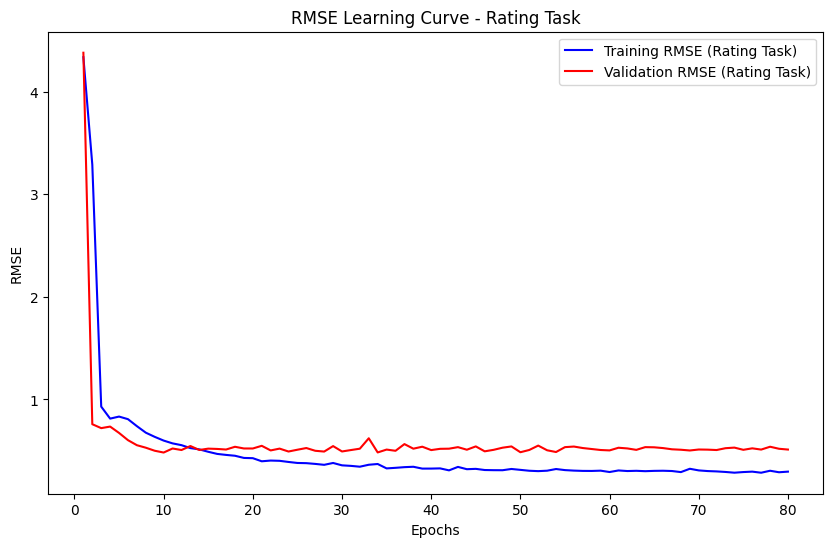

In [24]:
print(history.history.keys())

# Extract RMSE metrics from history
rating_rmse = history.history['rating_model_rating_rmse']
val_rating_rmse = history.history['val_rating_model_rating_rmse']

epochs_x = range(1, len(rating_rmse) + 1)

# Plot the RMSE learning curves for the rating task
plt.figure(figsize=(10, 6))
plt.plot(epochs_x, rating_rmse, 'b', label='Training RMSE (Rating Task)')
plt.plot(epochs_x, val_rating_rmse, 'r', label='Validation RMSE (Rating Task)')
plt.title('RMSE Learning Curve - Rating Task')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Display the learning curves of the comparison task.

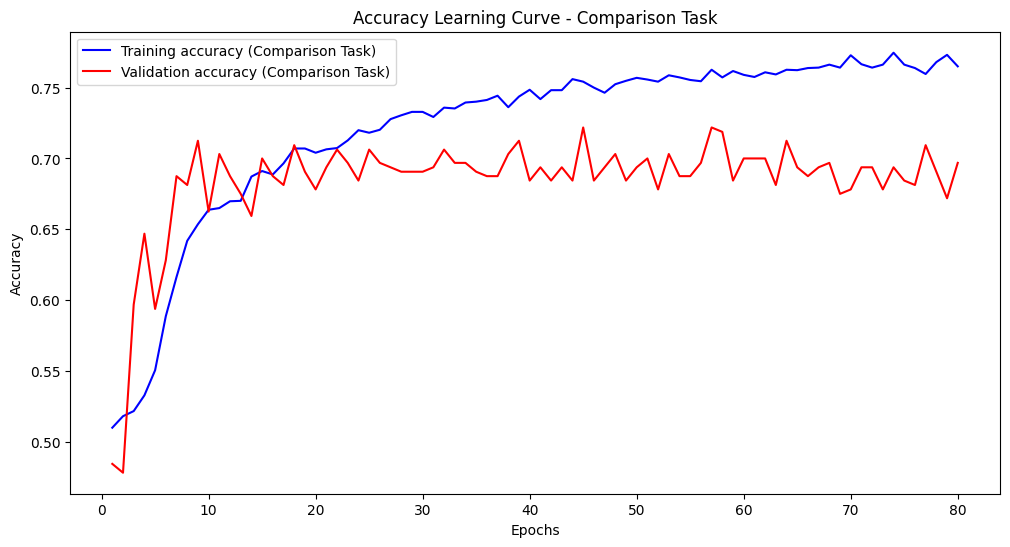

In [25]:
# Extract RMSE metrics from history
comparison_output_custom_binary_accuracy = history.history['comparison_model_custom_binary_accuracy']
val_comparison_output_custom_binary_accuracy = history.history['val_comparison_model_custom_binary_accuracy']


epochs_x = range(1, len(comparison_output_custom_binary_accuracy) + 1)

# Plot the RMSE learning curves for the comparison task
plt.figure(figsize=(12, 6))
plt.plot(epochs_x, comparison_output_custom_binary_accuracy, 'b', label='Training accuracy (Comparison Task)')
plt.plot(epochs_x, val_comparison_output_custom_binary_accuracy, 'r', label='Validation accuracy (Comparison Task)')
plt.title('Accuracy Learning Curve - Comparison Task')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Define a function that calculates Pearson correlation.

In [26]:
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''
    N = len(x)
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(N-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

Predict the scores for the images in the testing set. Display the predictions of the first 6 images.

In [27]:
# Rating Model
rating_predictions = []

X_val = X_val / 255.0
for img in X_val:
  img = img.reshape(1, 192, 256, 3)
  pred = rating_model.predict(img)
  rating_predictions.append(float(pred))

rating_predictions = np.array(rating_predictions)


1/1 [==============================] - 0s 14ms/step


/tmp/ipykernel_2129561/144748134.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rating_predictions.append(float(pred))


1/1 [==============================] - 0s 14ms/step


Display some websites of the test set and the predicted aesthetics score.

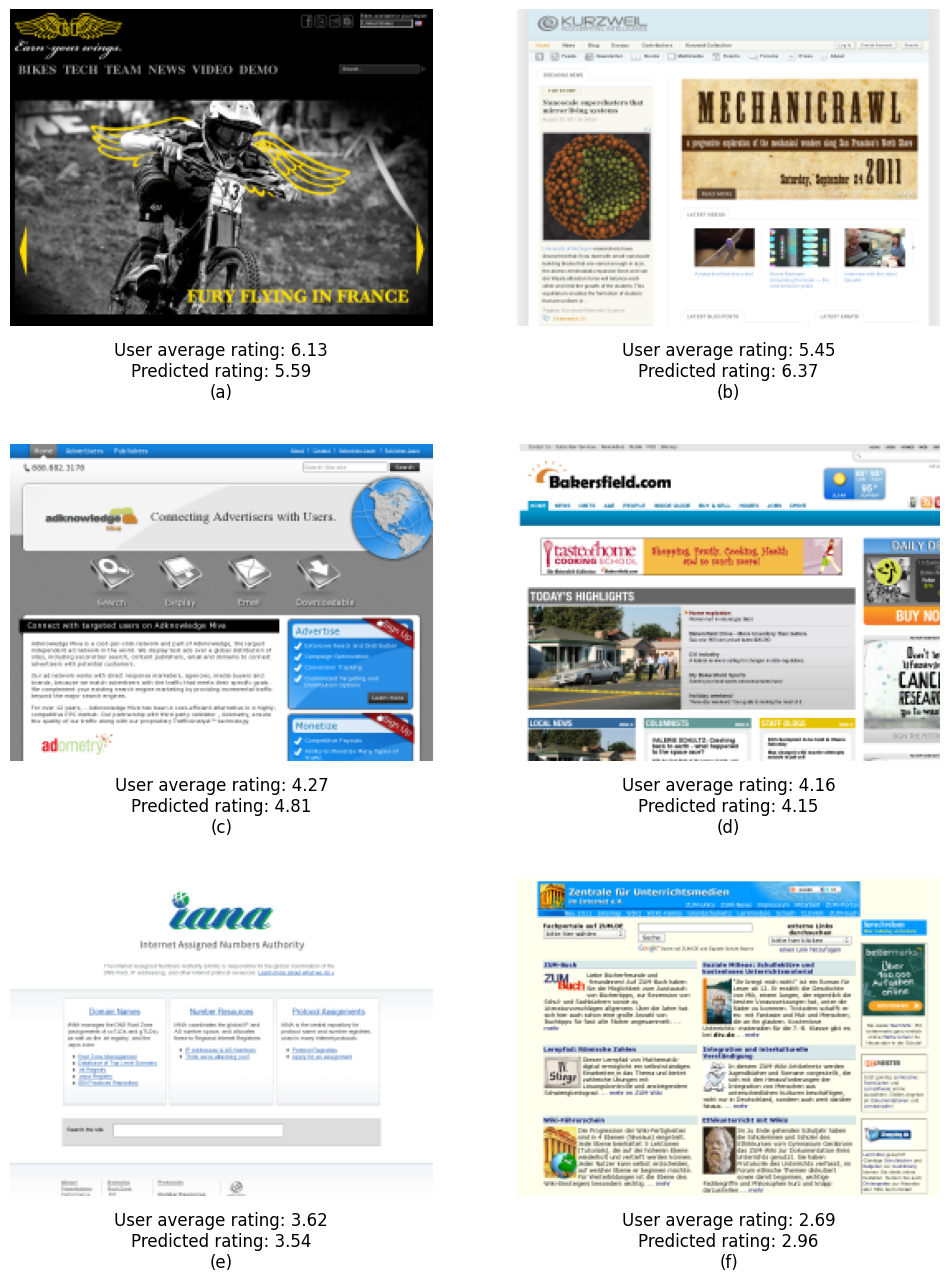

In [28]:
image_ids = [87, 45, 49, 94, 14, 83] # test image IDs sorted in descending order according to the website's aesthetics level

fig = plt.figure(figsize=(12, 16))
i = 1
for id in image_ids:
  if 'english' in test_images[id]:
    path = images_path + '/english_resized/' + test_images[id].rsplit('/', 1)[1]
  else:
    path = images_path + '/foreign_resized/' + test_images[id].rsplit('/', 1)[1]

  plt.subplot(len(image_ids)//2, 2, i)
  img = mping.imread(path)
  plt.title('User average rating: ' + str(np.round(y_val[id],2)) + '\nPredicted rating: ' + str(np.round(rating_predictions[id],2)) + '\n(' + chr(97+i-1) + ')', y=-0.25)
  plt.axis('off')
  plt.imshow(img)

  i += 1

plt.show()

Create a scatterplot to check the relationship between ground truth and predicted scores.

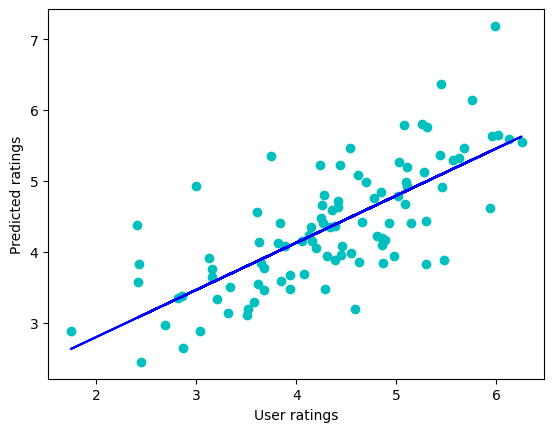

In [29]:
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(y_val, rating_predictions, 1)

fig = plt.figure()
plt.scatter(y_val, rating_predictions, c='c')
plt.plot(y_val, b + m * y_val, '-', c='b')
plt.xlabel('User ratings')
plt.ylabel('Predicted ratings')

plt.show()

Calculate the Pearson correlation and the RMSE between ground truth and predicted scores.

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

corr, p, lo, hi = pearsonr_ci(y_val, rating_predictions)
print('Pearsons correlation: r=%.2f, p=%.2e, CI=[%.2f, %.2f]' % (corr, p, lo, hi))
rmse_test = sqrt(mean_squared_error(y_val, rating_predictions))
print('RMSE: %.3f' % rmse_test)

Pearsons correlation: r=0.73, p=9.96e-18, CI=[0.63, 0.81]
RMSE: 0.675


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


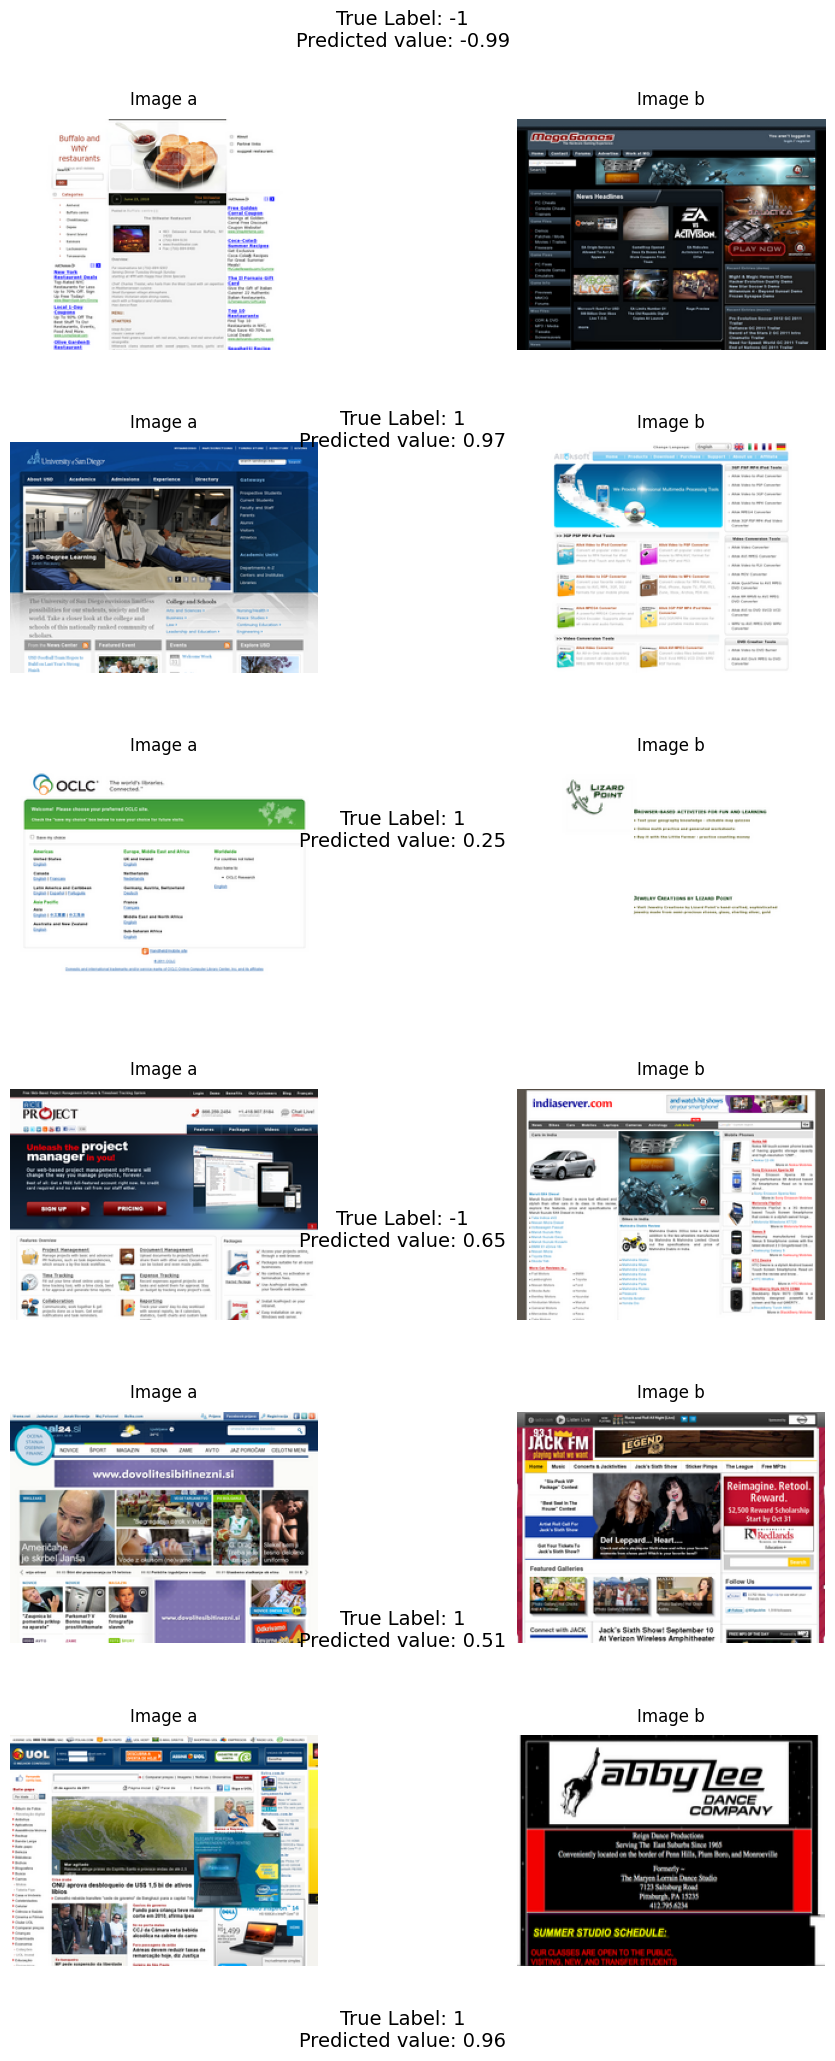

Custom Binary Accuracy: 0.6931216716766357


In [31]:
# # Comparison Model

# Normalize image pairs
def normalize_image_pairs(X_pairs):
    normalized_pairs = []
    for img1, img2 in X_pairs:
        img1_normalized = img1 / 255.0
        img2_normalized = img2 / 255.0
        normalized_pairs.append((img1_normalized, img2_normalized))
    return normalized_pairs

# Normalize the validation image pairs
X_pairs_val_normalized = normalize_image_pairs(X_pairs_val)

# Predict
comparison_predictions = []

for img1, img2 in X_pairs_val_normalized:
    # Add batch dimension
    img1_normalized = np.expand_dims(img1, axis=0)
    img2_normalized = np.expand_dims(img2, axis=0)
    
    # Predict
    pred = comparison_model.predict([img1_normalized, img2_normalized])
    comparison_predictions.append(float(pred[0][0]))

comparison_predictions = np.array(comparison_predictions)

# # Pick random pairs
# num_pairs_to_display = 6  # Number of pairs to display
# pair_ids = random.sample(range(len(X_pairs_val)), num_pairs_to_display)

# Manually select specific IDs
manual_pair_ids = [24, 56, 62, 45, 16, 87]  # Replace with desired IDs

# Plotting
fig, axes = plt.subplots(len(manual_pair_ids), 2, figsize=(12, len(manual_pair_ids) * 4))
fig.subplots_adjust(hspace=0.4)
i = 0
for idx, id in enumerate(manual_pair_ids):
    img1, img2 = X_pairs_val[id]
    
    # Plot first image of the pair
    axes[idx, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[idx, 0].axis('off')
    axes[idx, 0].set_title('Image a', fontsize=12, pad=10)
    
    # Plot second image of the pair
    axes[idx, 1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[idx, 1].axis('off')
    axes[idx, 1].set_title('Image b', fontsize=12, pad=10)
    
    # Add text with the true label and predicted value in the middle between the images
    fig.text(0.5, (len(manual_pair_ids) - idx - 0.5) / len(manual_pair_ids), 
             f'True Label: {y_pairs_val[id]}\nPredicted value: {comparison_predictions[id]:.2f}', 
             ha='center', va='center', fontsize=14)

plt.show()


# Calculate custom binary accuracy
accuracy = custom_binary_accuracy(y_pairs_val, comparison_predictions)

print(f"Custom Binary Accuracy: {accuracy.numpy()}")



# # Create a new model to output intermediate layer results
# layer_name = 'Summed_Difference'  # or any other layer you want to inspect
# intermediate_layer_model = models.Model(inputs=comparison_model.input, outputs=comparison_model.get_layer(layer_name).output)

# # Get the intermediate output
# intermediate_output = intermediate_layer_model.predict([img1_normalized, img2_normalized])
# print(f"Intermediate output of {layer_name}: {intermediate_output}")

# # Check the output before the tanh activation
# dense_output_model = models.Model(inputs=comparison_model.input, outputs=comparison_model.get_layer('comparison_output').output)
# dense_output = dense_output_model.predict([img1_normalized, img2_normalized])
# print(f"Output before tanh activation: {dense_output}")

Plot the distribution of ground truth scores and the distribution of predictions.

<Figure size 640x480 with 0 Axes>

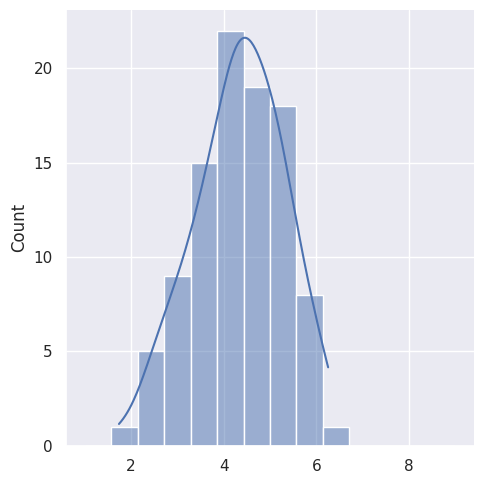

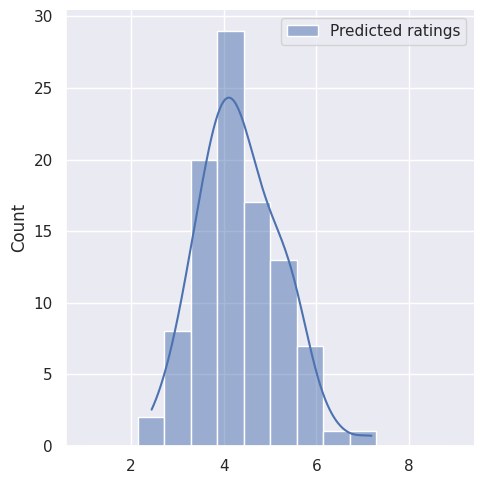

In [32]:
import seaborn as sns

fig = plt.figure()
sns.set(color_codes=True)

bins = np.linspace(1, 9, num=15)

sns.displot(y_val, bins=bins, label='User ratings', kde=True)

sns.displot(rating_predictions, bins=bins, label='Predicted ratings', kde=True)

plt.legend()

plt.show()


TESTTTTTTTTTTTTt

In [33]:
# # import math


# #Combined loss function
# def ONEPAIRLOSSCOMBINED(y_true, y_pred, alpha=0.5):
#     # Split y_true and y_pred
#     y_true_rating = y_true[0]
#     y_true_comparison = y_true[1]
#     y_pred_rating = y_pred[0]
#     y_pred_comparison = y_pred[1]

#     y_true_rating = tf.cast(y_true_rating, tf.float32)
#     y_true_comparison = tf.cast(y_true_comparison, tf.float32)

#     D_a = tf.cast(tf.size(y_true_rating), tf.float32)
#     D_b = tf.cast(tf.size(y_true_comparison), tf.float32)

#     loss_a = mse_regression_loss(y_true_rating, y_pred_rating)
#     loss_p = bradley_terry_loss(y_true_comparison, y_pred_comparison)

#     L_combined = alpha * (1 / D_a) * loss_a + (1 - alpha) * (1 / D_b) * loss_p
#     return L_combined

# def ONEPAIRLOSS(y_true, y_pred):
#     print(f"y_true shape: {y_true.shape}")
#     print(f"y_pred shape: {y_pred.shape}")

#     y_true_rating = y_true[0]
#     y_true_comparison = y_true[1]
#     y_pred_rating = y_pred[0]
#     y_pred_comparison = y_pred[1]

#     return ONEPAIRLOSSCOMBINED((y_true_rating, y_true_comparison), (y_pred_rating, y_pred_comparison), alpha=0.5)


# joint_model.compile(loss=ONEPAIRLOSS, optimizer=adam_optimizer,
#                     metrics={
#     'rating_output' : [rating_rmse],
#     'comparison_output' : [custom_binary_accuracy]
#      })


# # Define a function to limit the dataset to 20 samples and repeat it
# def limit_and_repeat_dataset(dataset, num_samples, repeat_count):
#     limited_dataset = dataset.take(num_samples)
#     repeated_dataset = limited_dataset.repeat(repeat_count)
#     return repeated_dataset


# # # Limit the dataset to 20 samples
# # limited_combined_gen_train = combined_gen_train.take(20)
# # # Limit the dataset to 20 samples
# # limited_combined_gen_val = combined_gen_val.take(20)

# # Assuming combined_gen_train and combined_gen_val are defined datasets
# # Limit and repeat the training and validation datasets
# repeat_count =200  # Adjust as needed
# limited_combined_gen_train = limit_and_repeat_dataset(combined_gen_train, 20,repeat_count)
# limited_combined_gen_val = limit_and_repeat_dataset(combined_gen_val, 20,repeat_count)

# # Optional: Verify the number of samples by iterating through the dataset
# count = 0
# for _ in limited_combined_gen_train:
#     count += 1

# print(f"Number of samples in limited dataset: {count}")

# batch_size = 10

# # # Debugging step to confirm shapes
# # print(f"single_image shape: {single_image.shape}")
# # print(f"single_pair_images shape: {single_pair_images.shape}")
# # print(f"single_image shape: {single_image.shape}")
# # print(f"single_pair_image_a shape: {single_pair_image_a.shape}")
# # print(f"single_pair_image_b shape: {single_pair_image_b.shape}")
# # print(f"single_label shape: {single_label.shape}")
# # print(f"single_pair_label shape: {single_pair_label.shape}")

# # Train the model using the limited dataset
# history = joint_model.fit(
#     limited_combined_gen_train,
#     steps_per_epoch=(5*20) // batch_size,
#     epochs=70,  # Use a small number of epochs for testing
#     validation_data=limited_combined_gen_val,
#     validation_steps=(5*20) // batch_size
# )


# # def single_image_rating_generator(image, label, batch_size):
# #     while True:
# #         batch_images = np.repeat(image[np.newaxis, :], batch_size, axis=0)
# #         batch_labels = np.repeat(label, batch_size)
# #         yield batch_images, batch_labels

# # def single_pair_comparison_generator(pair_images, label, batch_size):
# #     while True:
# #         batch_images_1 = np.repeat(pair_images[0][np.newaxis, :], batch_size, axis=0)
# #         batch_images_2 = np.repeat(pair_images[1][np.newaxis, :], batch_size, axis=0)
# #         batch_labels = np.repeat(label, batch_size)
# #         yield (batch_images_1, batch_images_2), batch_labels


# # def combined_single_data_generator(single_image, single_image_label, pair_images, pair_label, batch_size):
# #     rating_gen = single_image_rating_generator(single_image, single_image_label, batch_size)
# #     comparison_gen = single_pair_comparison_generator(pair_images, pair_label, batch_size)
    
# #     while True:
# #         rating_batch = next(rating_gen)
# #         comparison_batch = next(comparison_gen)
        
# #         combined_images = (
# #             rating_batch[0],
# #             comparison_batch[0][0],
# #             comparison_batch[0][1]
# #         )
# #         combined_labels = (
# #             rating_batch[1],
# #             comparison_batch[1]
# #         )
# #         yield combined_images, combined_labels


# # combined_gen_single = tf.data.Dataset.from_generator(
# #     lambda: combined_single_data_generator(single_image, single_image_label, pair_images, pair_label, batch_size),
# #     output_signature=(
# #         (
# #             tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
# #             tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32),
# #             tf.TensorSpec(shape=(None, 192, 256, 3), dtype=tf.float32)
# #         ),
# #         (
# #             tf.TensorSpec(shape=(None,), dtype=tf.float32),
# #             tf.TensorSpec(shape=(None,), dtype=tf.float32)
# #         )
# #     )
# # )

In [34]:
# print(history.history.keys())

# # Extract RMSE metrics from history
# rating_rmse = history.history['rating_output_rating_rmse']
# val_rating_rmse = history.history['val_rating_output_rating_rmse']

# epochs_x = range(1, len(rating_rmse) + 1)

# # Plot the RMSE learning curves for the rating task
# plt.figure(figsize=(10, 6))
# plt.plot(epochs_x, rating_rmse, 'b', label='Training RMSE (Rating Task)')
# plt.plot(epochs_x, val_rating_rmse, 'r', label='Validation RMSE (Rating Task)')
# plt.title('RMSE Learning Curve - Rating Task')
# plt.xlabel('Epochs')
# plt.ylabel('RMSE')
# plt.legend()
# plt.show()


# # Plot both Heads simeltaneously
# # plt.figure(figsize=(12, 6))

# # plt.subplot(1, 2, 1)
# # plt.plot(rating_rmse, label='Training RMSE')
# # plt.plot(val_rating_rmse, label='Validation RMSE')
# # plt.xlabel('Epochs')
# # plt.ylabel('RMSE')
# # plt.title('Rating RMSE')
# # plt.legend()

# # plt.subplot(1, 2, 2)
# # plt.plot(comparison_rmse, label='Training RMSE')
# # plt.plot(val_comparison_rmse, label='Validation RMSE')
# # plt.xlabel('Epochs')
# # plt.ylabel('RMSE')
# # plt.title('Comparison RMSE')
# # plt.legend()

# # plt.show()

: 